In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.colors import ListedColormap
df = pd.read_csv('Zoo.csv')

print(df.head())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None

Missing values ch

/tmp/ipykernel_8899/3983855939.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


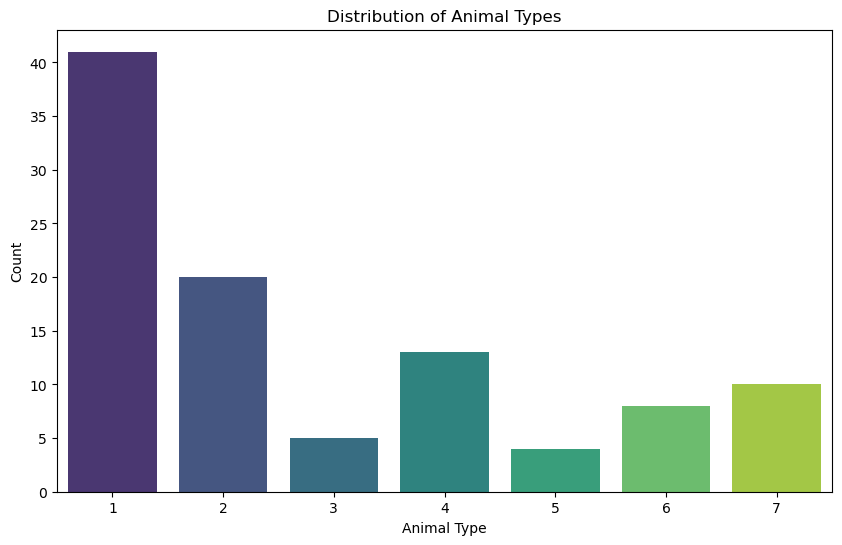

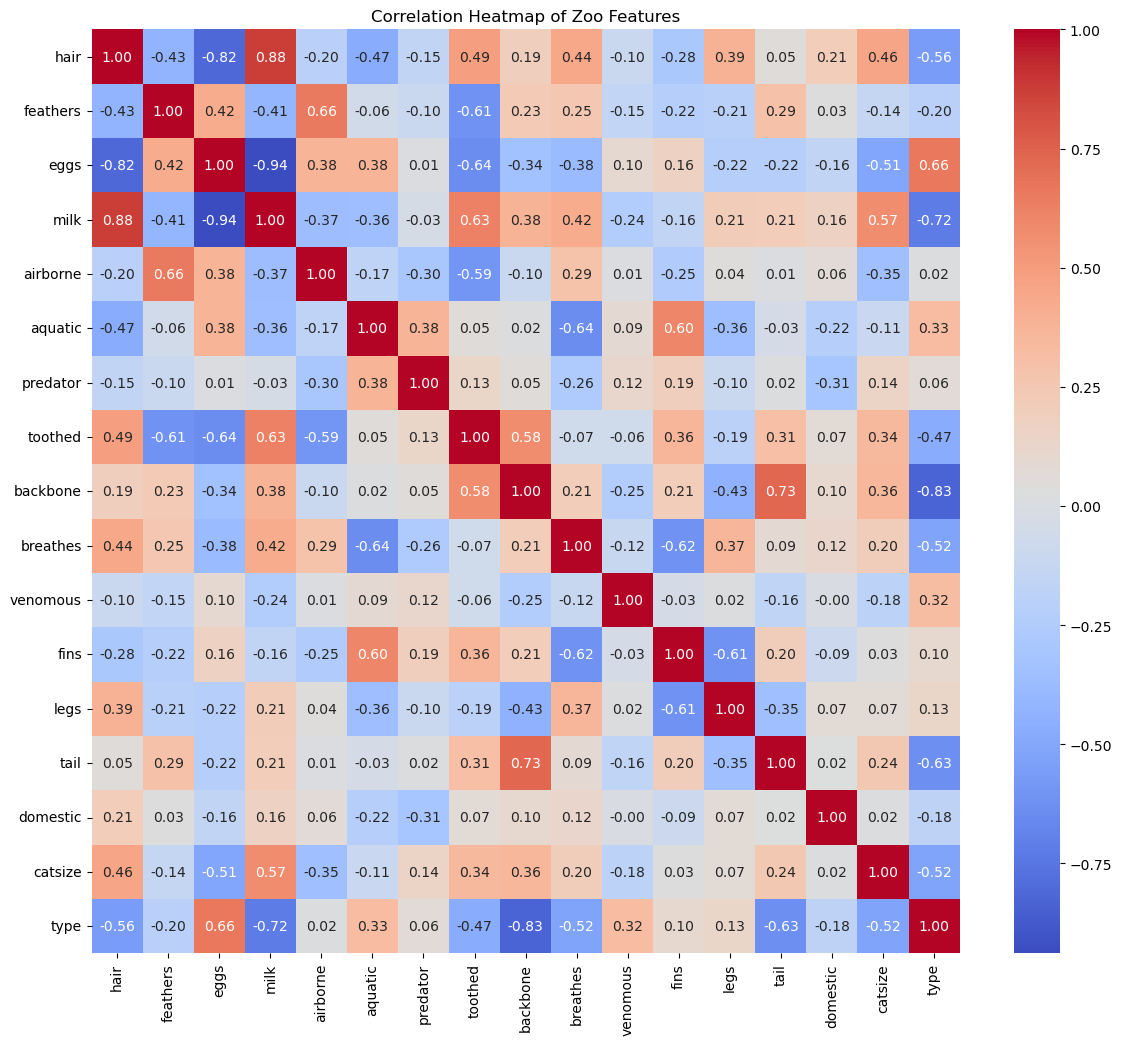

In [2]:
print(df.info())

print("\nMissing values check:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.savefig('animal_type_distribution.png')
plt.show()

plt.figure(figsize=(14, 12))
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Zoo Features')
plt.savefig('correlation_heatmap.png')
plt.show()

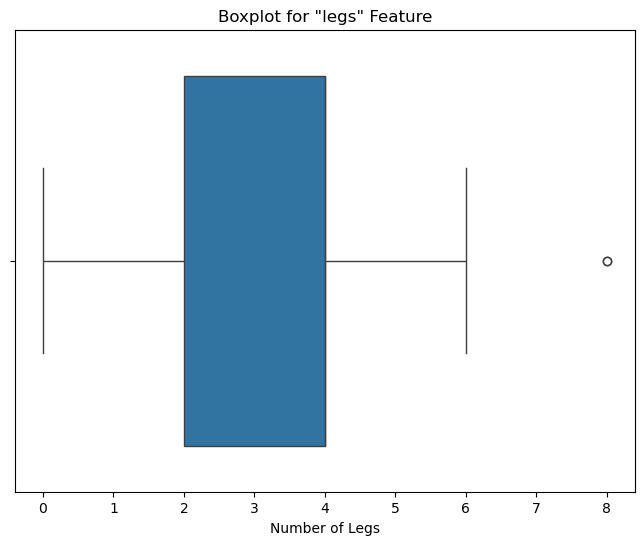

Interquartile Range (IQR): 2.0
Lower Bound for Outliers: -1.0
Upper Bound for Outliers: 7.0

Identified Outliers based on IQR method:
   animal name  legs
53     octopus     8
72    scorpion     8

Conclusion: The identified 'outliers' are valid data points representing real animals.
Therefore, no data will be removed from the dataset.


In [3]:
# Create a boxplot to visualize outliers in the 'legs' feature
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['legs'])
plt.title('Boxplot for "legs" Feature')
plt.xlabel('Number of Legs')
plt.show()

# --- Handling Outliers using IQR Method ---
# Note: As discussed, this is for demonstration. For this specific dataset,
# removing these "outliers" is not appropriate as they represent valid
# animal characteristics (e.g., insects with 6 legs, spiders with 8).

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['legs'].quantile(0.25)
Q3 = df['legs'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

# Identify outliers based on the IQR method
outliers = df[(df['legs'] < lower_bound) | (df['legs'] > upper_bound)]
print("\nIdentified Outliers based on IQR method:")
print(outliers[['animal name', 'legs']])

print("\nConclusion: The identified 'outliers' are valid data points representing real animals.")
print("Therefore, no data will be removed from the dataset.")

In [4]:
X = df.drop(['animal name', 'type'], axis=1)

y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (80, 16)
Shape of X_test: (21, 16)
Shape of y_train: (80,)
Shape of y_test: (21,)


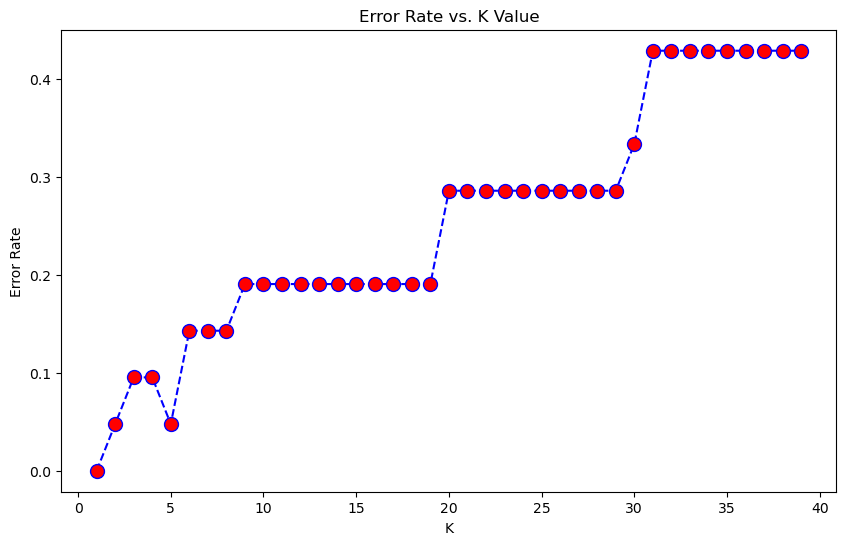

KNeighborsClassifier()

In [5]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('knn_error_rate.png')
plt.show()

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

knn_classifier.fit(X_train, y_train)

In [6]:
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred, zero_division=1)
print("\nClassification Report:")
print(report)

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.96      0.86      0.84        21
weighted avg       0.96      0.95      0.93        21



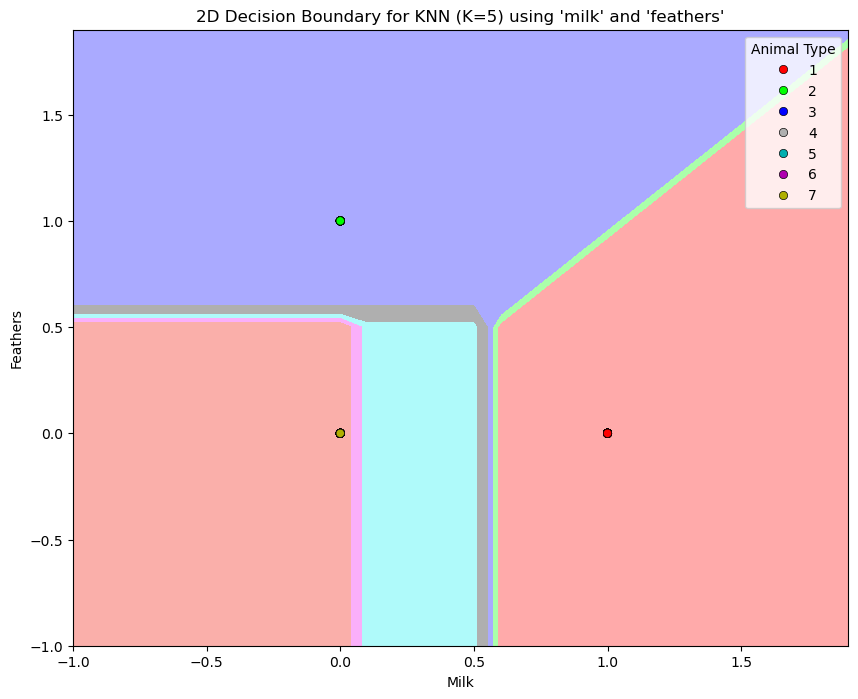

In [7]:
X_vis = df[['milk', 'feathers']].values
y_vis = df['type'].values

classifier_vis = KNeighborsClassifier(n_neighbors=5)
classifier_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = classifier_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF', '#AFFAFA', '#FAAFFA', '#FAAFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#AFAFAF', '#00AFAF', '#AF00AF', '#AFAF00'])


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=df['type'],
                palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2D Decision Boundary for KNN (K=5) using 'milk' and 'feathers'")
plt.xlabel('Milk')
plt.ylabel('Feathers')
plt.legend(title='Animal Type')
plt.savefig('decision_boundary.png')
plt.show()

# KNN Interview Questions

## 1. What are the key hyperparameters in KNN?

The K-Nearest Neighbors algorithm has two primary hyperparameters:

- **K (`n_neighbors`)**:  
  This is the most critical hyperparameter. It represents the number of nearest neighbors to consider when making a prediction.  
  - Small `K` → Sensitive to noise (high variance)  
  - Large `K` → Oversmooths decision boundary (high bias)

- **Distance Metric (`metric`)**:  
  Determines how the "distance" or "similarity" between data points is calculated. The choice of metric significantly impacts model performance based on data type.

---

## 2. What distance metrics can be used in KNN?

Several distance metrics can be used in KNN depending on the type of data (continuous, boolean, categorical):

### Euclidean Distance (`minkowski` with `p=2`)
- Most common distance metric.
- Good for continuous numerical data.
- Formula:  
  $$
  d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
  $$

---

### Manhattan Distance (`minkowski` with `p=1`)
- Also called "City Block" distance.
- Better for high-dimensional data.
- Formula:  
  $$
  d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
  $$

---

### Minkowski Distance (Generalized form)
- A generalization of both Euclidean and Manhattan.
- `p` is the parameter that defines the distance type.
- Formula:  
  $$
  d(p, q) = \left(\sum_{i=1}^{n} |p_i - q_i|^p\right)^{1/p}
  $$

---

### Hamming Distance
- Used for **categorical or binary** data.
- Measures the number of positions at which the corresponding values are different.
- Example:  
  - `"karolin"` vs `"kathrin"` → Hamming Distance = 3

---
